# **Task 1: Titanic Survival Prediction**

# **Importing Required Libraries**
We are using the following libraries to complete the task of titanic survival prediction:


*   Numpy
*   Pandas
*   re: To work with regular expressions
*   Seaborn
*   Matplotlib
*   Skelarn etc.



In [455]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#**Reading Dataset and Data preprocessing**
The importing of data is an important step in the process. Also data pre-processing is neccessary .Data Pre-Processing refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis. The goal of data preprocessing is to improve the quality of the data and to make it more suitable for the specific task.


In [456]:
train = pd.read_csv('/titanic-training-data.csv')
test = pd.read_csv('/tested.csv')

# To know number of columns and rows
train.shape
# (891, 12)

(891, 12)

In [457]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [458]:
#lets take a look at our training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [459]:
# Now the test dataset
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [460]:
#list of all the columns in our training dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [461]:
# summary statistics of data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [462]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [463]:
#percantage of missing values in train dataset
train.isnull().sum()/ len(train) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [464]:
#Finding the Null values in test dataset
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [465]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

,Sex,Survived
0,female,0.742038
1,male,0.188908


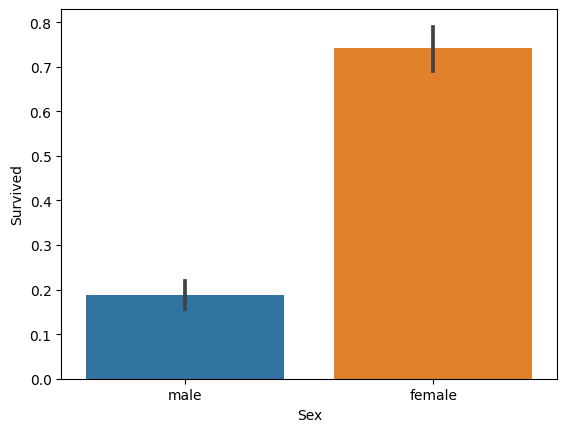

In [466]:
#Comparing the Sex and Survived feature
sns.barplot(x='Sex',y='Survived',data=train)
train.groupby('Sex',as_index=False).Survived.mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


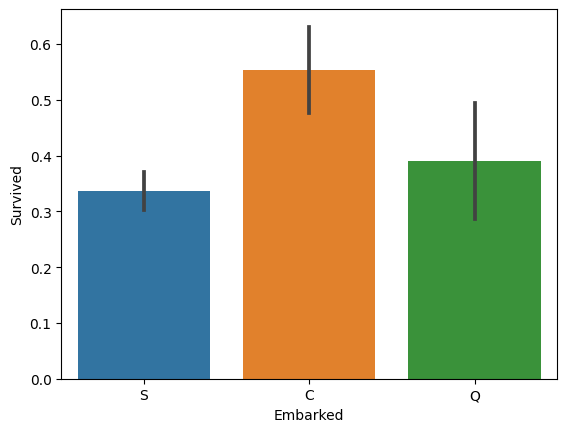

In [467]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train)
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

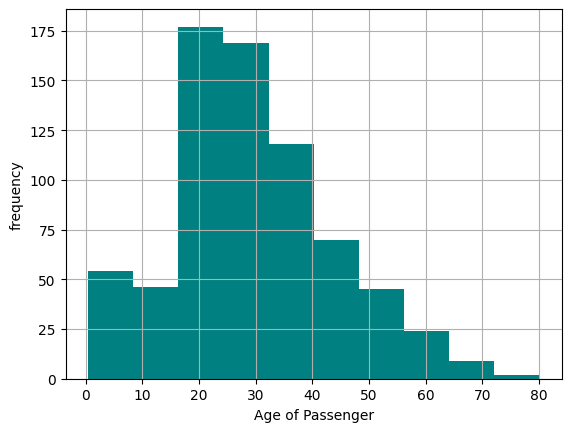

Median age of passengers : 28
Standard Deviation of age of passengers : 14


In [468]:
train.Age.hist(bins=10,color='teal')
plt.xlabel('Age of Passenger')
plt.ylabel('frequency')
plt.show()
print("Median age of passengers :", int(train.Age.median()))
print("Standard Deviation of age of passengers :", int(train.Age.std()))

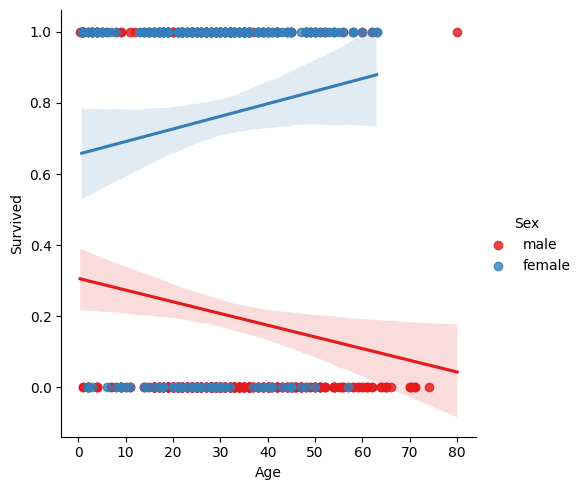

In [469]:
sns.lmplot(x='Age',y='Survived',data=train,hue='Sex',palette='Set1')

,Sex,Age
0,female,27.0
1,male,29.0


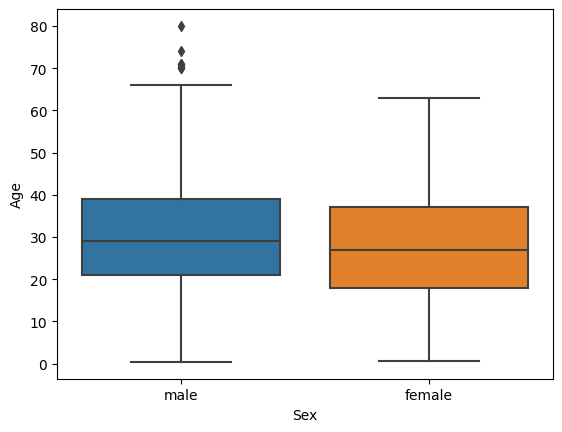

In [471]:
# plotting boxplot and Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train)

#getting the median age according to Sex
train.groupby('Sex',as_index=False)['Age'].median()

<Axes: xlabel='Fare'>

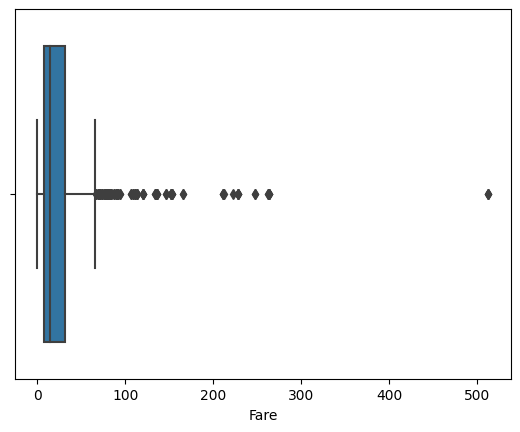

In [472]:
#plotting the Fare column to see the spread of data
sns.boxplot(x="Fare",data=train)

In [473]:
#dropping the coulmns, no more required
drop_list=['Cabin','Ticket']

train_1 = train.drop(drop_list,axis=1)
test_passenger = pd.DataFrame(test.PassengerId)
test_1 = test.drop(drop_list,axis=1)

test_passenger.head()
test_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [474]:
#filling the missing values in Embarked column in train and test datasets
train_1.Embarked.fillna('S',inplace=True)
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [479]:
#filling the missing values in the Age column
train_1.Age.fillna(28, inplace=True)
test_1.Age.fillna(28, inplace=True)
train_1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


In [481]:
#Filling the null values in Fare values with median in test dataset
test_1.Fare.fillna(test.Fare.median(), inplace=True)

In [480]:
#combining train and test dataframes
Concat_data = [train_1, test_1]

<Axes: xlabel='count', ylabel='Title'>

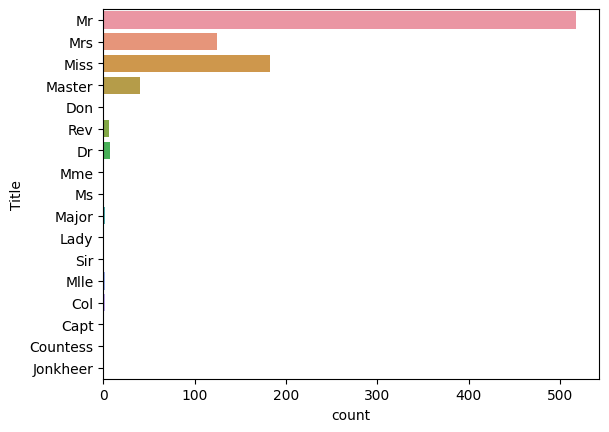

In [482]:
#extracting the various title in Names
for dataset in Concat_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles
sns.countplot(y='Title',data=train_1)

In [483]:
#Refining the title
for dataset in Concat_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

train_1.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<Axes: xlabel='count', ylabel='Title'>

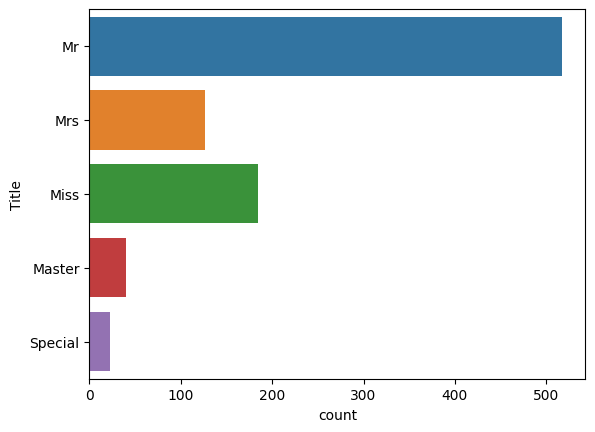

In [484]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train_1)

In [485]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Concat_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [487]:
#dropping the Name,SibSP and Parch columns
for dataset in Concat_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)

In [489]:
train_1['Old_Female'] = (train_1['Age']>50)&(train_1['Sex']=='female')
train_1['Old_Female'] = train_1['Old_Female'].astype(int)

test_1['Old_Female'] = (test_1['Age']>50)&(test_1['Sex']=='female')
test_1['Old_Female'] = test_1['Old_Female'].astype(int)

In [490]:
#Converting categorical variables into numerical ones
train_2 = pd.get_dummies(train_1,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_2 = pd.get_dummies(test_1,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_2.head()

,PassengerId,Survived,Age,Fare,Title,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,1,0,0,1,1,0,1
1,2,1,38.0,71.2833,3,0,0,0,0,0,0
2,3,1,26.0,7.9250,2,0,0,1,0,0,1
3,4,1,35.0,53.1000,3,0,0,0,0,0,1
4,5,0,35.0,8.0500,1,0,0,1,1,0,1


In [495]:
train_2.head()
#sns.barplot('AgeBands','Survived',data=train_df2)

,PassengerId,Survived,Age,Fare,Title,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands
0,1,0,22.0,7.2500,1,0,0,1,1,0,1,0
1,2,1,38.0,71.2833,3,0,0,0,0,0,0,3
2,3,1,26.0,7.9250,2,0,0,1,0,0,1,1
3,4,1,35.0,53.1000,3,0,0,0,0,0,1,2
4,5,0,35.0,8.0500,1,0,0,1,1,0,1,2


In [496]:
test_2.head()

,PassengerId,Survived,Age,Fare,Title,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands
0,892,0,34.5,7.8292,1,0,0,1,1,1,0,2
1,893,1,47.0,7.0000,3,0,0,1,0,0,1,3
2,894,0,62.0,9.6875,1,0,1,0,1,1,0,3
3,895,0,27.0,8.6625,1,0,0,1,1,0,1,1
4,896,1,22.0,12.2875,3,0,0,1,0,0,1,0


# **Fitting a model**
Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. Each machine learning algorithm has a basic set of parameters that can be changed to improve its accuracy. During the fitting process, you run an algorithm on data for which you know the target variable, known as “labeled” data, and produce a machine learning model.In this project we are fitting a decision tree .

In [497]:
#importing the required ML libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [498]:
#Splitting training data into features and target
X = train_2.drop("Survived",axis=1)
y = train_2["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)
X_train.head()

,PassengerId,Age,Fare,Title,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands
451,452,28.0,19.9667,1,0,0,1,1,0,1,1
345,346,24.0,13.0000,2,0,1,0,0,0,1,1
687,688,19.0,10.1708,1,0,0,1,1,0,1,0
279,280,35.0,20.2500,3,0,0,1,0,0,1,2
742,743,21.0,262.3750,2,0,0,0,0,0,0,0


In [499]:
#Fitting a decision tree
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}
clsft_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)
clsft_cv.fit(X, y)
clsft_cv.best_params_,clsft_cv.best_score_*100
print('Best score:',clsft_cv.best_score_*100)

Best score: 82.48948590797816


#**Model Evaluation**

In [504]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train=clf.predict(X_train)
accuracy_train=accuracy_score(y_pred_train,y_train)
y_predicted = clf.predict(X_test)
accuracy_test=accuracy_score(y_predicted,y_test)


In [505]:
accuracy_train

0.8475120385232745

In [506]:
accuracy_test

0.8097014925373134